In [1]:
%load_ext autoreload
%autoreload 2

# TSN

## logistic latent y

you can change the `tsn_latent_type` to normal. then for `tsn_latent_var_list` you need `mean, sigma` instead of `low, high`.

In [2]:
from rad_sim.simulators.temporal.demos import TsnLatentLogisticYSimulator
import numpy as np

sim = TsnLatentLogisticYSimulator(
    tsn_latent_type='uniform',
    tsn_latent_var_list=[
        {'name': 'slope', 'low': -2, 'high': 2},
        {'name': 'intercept', 'low': -3, 'high': 3},
        {'name': 'amplitude', 'low': 1, 'high': 5},
        {'name': 'frequency', 'low': np.pi/10, 'high': np.pi/4},
        {'name': 'phaseshift', 'low': -np.pi/6, 'high': np.pi/6}
    ],
    tsn_noise_sigma=0,
    y_beta_coef_range=[1, 3],
    y_sigmoid_offset=0,
    latent_subset_for_label=['slope', 'frequency']
)

x, y = sim.sample(sample_size=20, seq_len=5)

In [3]:
print(x.shape)
print(y)

(20, 5)
[0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0]


## 2 distributions latent y

In [10]:
from rad_sim.simulators.temporal.demos import TsnLatent2distYSimulator

shared_var_list = [
    {'name': 'slope', 'mean': 0, 'sigma': 2, 'log': False},
    {'name': 'intercept', 'mean': 0, 'sigma': 3, 'log': False},
    {'name': 'amplitude', 'mean': 2, 'sigma': 2, 'log': True},
    {'name': 'phaseshift', 'mean': 0, 'sigma': np.pi/4, 'log': False}
]
var_list_0 = shared_var_list.copy()
var_list_0.append({'name': 'frequency', 'mean': np.pi/10, 'sigma': np.pi/20, 'log': True})
var_list_1 = shared_var_list.copy()
var_list_1.append({'name': 'frequency', 'mean': np.pi/5, 'sigma': np.pi/20, 'log': True})

sim = TsnLatent2distYSimulator(
    tsn_latent_type='normal',
    dist_0_var_list=var_list_0,
    dist_1_var_list=var_list_1,
    tsn_noise_sigma=1,
    class_ratio=0.5
)

x, y = sim.sample(sample_size=10, seq_len=20)

In [11]:
print(x.shape)
print(y)

(10, 20)
[0 1 1 0 1 0 1 0 1 0]


## Latent shapelet y

In [14]:
from rad_sim.simulators.temporal.demos import TsnShapeletYSimulator
import numpy as np

sim = TsnShapeletYSimulator(
    tsn_latent_type='uniform',
    tsn_latent_var_list=[
        {'name': 'slope', 'low': -2, 'high': 2},
        {'name': 'intercept', 'low': -3, 'high': 3},
        {'name': 'amplitude', 'low': 1, 'high': 5},
        {'name': 'frequency', 'low': np.pi/10, 'high': np.pi/4},
        {'name': 'phaseshift', 'low': -np.pi/6, 'high': np.pi/6}
    ],
    tsn_noise_sigma=1,
    shapelet_window_ratio=0.3,
    shapelet_num_sin=5,
    shapelet_added_noise=0.1,
    class_ratio=0.3
)
x, y = sim.sample(sample_size=10, seq_len=30)

y

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

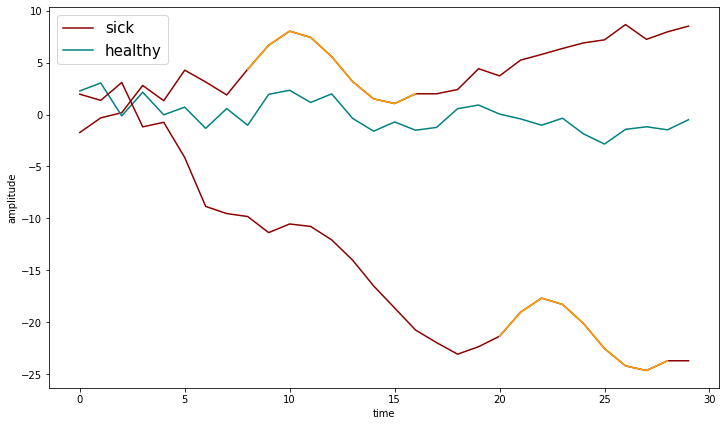

In [37]:
from matplotlib import pyplot as plt

s1 = x[4]; s2 = x[6]; s3 = x[3]
ind1 = sim.label_maker.shapelet_placement_idx[4]
ind2 = sim.label_maker.shapelet_placement_idx[6]

plt.figure(figsize=(12, 7))

plt.plot(range(len(s1)), s1-3, c='darkred', label='sick')
plt.plot(range(ind1, ind1+9), s1[ind1:ind1+9]-3, c='orange')

plt.plot(range(len(s3)), s3+1, c='teal', label='healthy')

plt.plot(range(len(s2)), s2, c='darkred')
plt.plot(range(ind2, ind2+9), s2[ind2:ind2+9], c='orange')

plt.legend(prop={'size':15})
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

# Fourier Series

## 2 distributions Y

As an example, two distributions are only different in frequency mean and amplitude decay ratio (you can define them as different as you like)

In [3]:
from rad_sim.simulators.temporal.demos import FsLogNormalLatent2distYSimulator
import numpy as np

FREQ_SIGMA = np.pi/20
NEXT_FREQ_RATIO = 1.7
NUM_SIN = 10


sim = FsLogNormalLatent2distYSimulator(
    dist_0_frequency_mean=np.pi/10,
    dist_1_frequency_mean=np.pi/30,
    dist_0_frequency_sigma=FREQ_SIGMA,
    dist_1_frequency_sigma=FREQ_SIGMA,
    dist_0_next_frequency_ratio=NEXT_FREQ_RATIO,
    dist_1_next_frequency_ratio=NEXT_FREQ_RATIO,
    fs_phi_latent_type='normal',
    # if latent type=normal, then [mean, sigmal], if uniform, then [low, high]
    dist_0_phi_config=[0, np.pi/4],
    dist_1_phi_config=[0, np.pi/4],
    dist_0_num_sin=NUM_SIN,
    dist_1_num_sin=NUM_SIN,
    dist_0_dominant_amplitude=1,
    dist_1_dominant_amplitude=1,
    dist_0_amplitude_exp_decay_rate=1,
    dist_1_amplitude_exp_decay_rate=1.5,
    dist_0_added_noise_sigma_ratio=0,
    dist_1_added_noise_sigma_ratio=0,
    class_ratio=0.7
)
x, y = sim.sample(sample_size=10, seq_len=5)

In [4]:
print(x.shape)
print(y)

(10, 5)
[1 1 1 1 0 1 1 1 0 0]


## Logistic Latent Y

### Log Normal distribution

In [21]:
from rad_sim.simulators.temporal.demos import FsLogNormalLatentLogisticYSimulator
import numpy as np

sim = FsLogNormalLatentLogisticYSimulator(
    fs_num_sin=10,
    fs_frequency_mean=np.pi/5,
    fs_frequency_sigma=np.pi/5,
    fs_phi_mean=0,
    fs_phi_sigma=np.pi/4,
    fs_next_frequency_ratio=2,
    fs_dominant_amplitude=1,
    fs_amplitude_exp_decay_rate=1.5,
    fs_added_noise_sigma_ratio=0,
    y_beta_coef_range=[1, 3],
    y_sigmoid_offset=0,
    latent_subset_for_label=['w_0', 'w_1']
)

x, y = sim.sample(sample_size=10, seq_len=5)

In [23]:
print(x.shape)
print(y)

(10, 5)
[1 0 0 0 0 1 0 1 1 1]


### Uniform Distribution

In [27]:
from rad_sim.simulators.temporal.demos import FsUniformLatentLogisticYSimulator

sim = FsUniformLatentLogisticYSimulator(
    fs_num_sin=10,
    fs_frequency_range=[np.pi/20, np.pi/10],
    fs_phi_range=[-np.pi/4, np.pi/4],
    fs_dominant_amplitude=1,
    fs_amplitude_exp_decay_rate=1.5,
    fs_added_noise_sigma_ratio=0,
    y_beta_coef_range=[1, 3],
    y_sigmoid_offset=0,
    latent_subset_for_label=['w_0', 'w_1', 'w_2']
)
x, y = sim.sample(sample_size=10, seq_len=5)

In [28]:
print(x.shape)
print(y)

(10, 5)
[1 1 1 1 1 0 1 0 0 0]
